In [1]:
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [24]:
# read stations csv
stations = []
with open('stations.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # remove leading spaces then append
        row = [x.strip() for x in row]
        stations.append(row)

In [3]:
# read routes csv
routes = []
with open('routes.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # remove leading spaces then append
        row = [x.strip() for x in row]
        routes.append(row)

In [4]:
# define network graph
G = nx.Graph()
# assign stations as nodes of the graph
for station in stations[0]:
    G.add_node(station)
# assign routes as edges of the graph
for route in routes:
    G.add_edge(route[0], route[1], weight=int(route[2]))

In [118]:
# determine routes between two stations
n_routes = 100 # number of routes to be determined
i = 0 # counter
route_list = []
with tqdm(total=n_routes) as pbar:
    while i < n_routes:        
        # randomly select two stations
        start = np.random.choice(stations[0])
        end = np.random.choice(stations[0])
        # check that the two stations are not the same and are not neighbors
        while (start == end) or (end in G.neighbors(start)):
            end = np.random.choice(stations[0])
        # determine the shortest route between the two stations
        pts = nx.shortest_path_length(G, start, end, weight='weight')
        # set the route 
        route = (start, end, pts)
        route_inv = (end, start, pts)
        # check that the route is not already in the list
        if (route not in route_list) and (route_inv not in route_list):
            route_list.append(route)
            i += 1
            pbar.update(1)

100%|██████████| 100/100 [00:00<00:00, 3805.46it/s]


In [119]:
# get unique starting points and counts
start_pts = [x[0] for x in route_list]
start_pts, start_counts = np.unique(start_pts, return_counts=True)
# get unique ending points and counts
end_pts = [x[1] for x in route_list]
end_pts, end_counts = np.unique(end_pts, return_counts=True)
# get unique point values and counts
pts = [x[2] for x in route_list]
pts, pt_counts = np.unique(pts, return_counts=True)

In [120]:
# print the numbers of unique starting points, ending points, and point values
print('Number of unique starting points: {}'.format(len(start_pts)))
print('Number of unique ending points: {}'.format(len(end_pts)))
print('Number of unique point values: {}'.format(len(pts)))

Number of unique starting points: 34
Number of unique ending points: 33
Number of unique point values: 20


In [121]:
# print number of stations
print('Number of stations: {}'.format(len(stations[0])))

Number of stations: 36


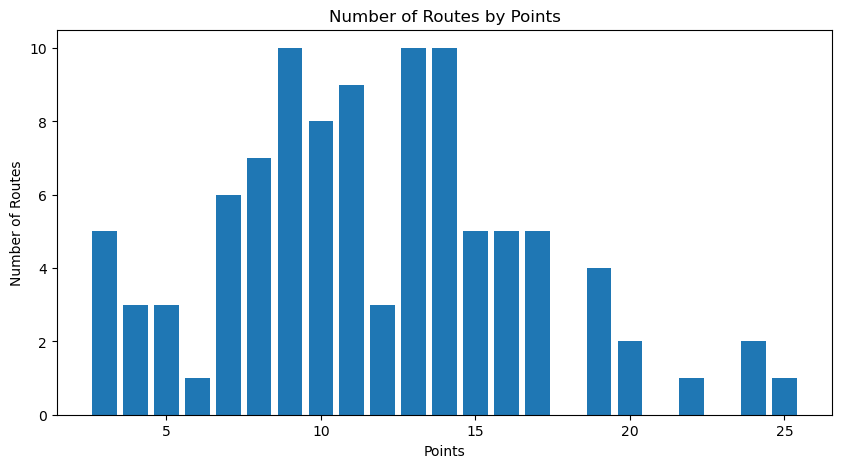

In [122]:
# visualize points
plt.figure(figsize=(10, 5))
plt.bar(pts, pt_counts)
plt.xlabel('Points')
plt.ylabel('Number of Routes')
plt.title('Number of Routes by Points')
plt.show()

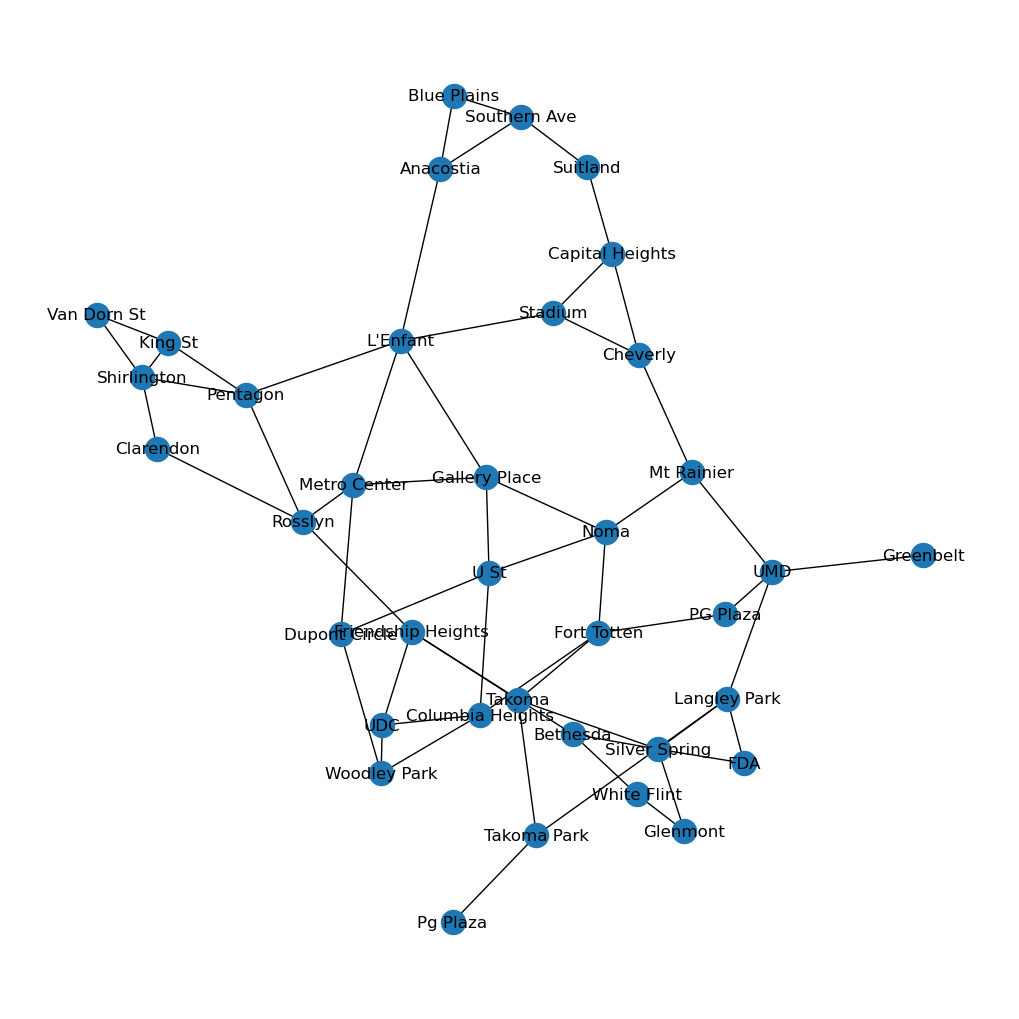

In [123]:
# visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True)
plt.show()

In [124]:
# calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)
# calculate closeness centrality
closeness = nx.closeness_centrality(G)
# calculate degree centrality
degree = nx.degree_centrality(G)

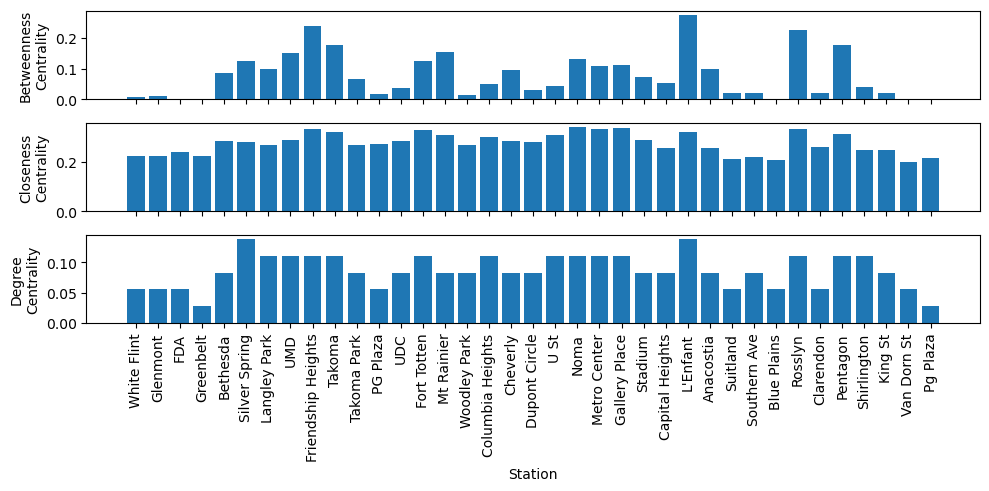

In [125]:
# plot all centrality measures
fig, ax = plt.subplots(3, 1, figsize=(10, 5), sharex=True)
ax[0].bar(betweenness.keys(), betweenness.values())
ax[0].set_ylabel('Betweenness\nCentrality')
ax[1].bar(closeness.keys(), closeness.values())
ax[1].set_ylabel('Closeness\nCentrality')
ax[2].bar(degree.keys(), degree.values())
ax[2].set_ylabel('Degree\nCentrality')
ax[2].set_xlabel('Station')
# rotate x-axis labels
for tick in ax[2].get_xticklabels():
    tick.set_rotation(90)
plt.tight_layout()
plt.show()

In [126]:
# write out routes to a new csv file
with open('routes_new.csv', 'w') as f:
    writer = csv.writer(f)
    for route in route_list:
        writer.writerow(route)